In [1]:
%load_ext autotime

time: 751 µs (started: 2022-01-02 17:55:20 +01:00)


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from bs4 import BeautifulSoup
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
from sklearn.metrics import confusion_matrix
warnings.simplefilter(action='ignore', category=Warning)
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import hamming_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from sklearn.decomposition import TruncatedSVD
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from datetime import datetime


time: 9.8 s (started: 2022-01-02 17:55:20 +01:00)


# 1 - Import ----------------------------------------

In [3]:
lst = []
for i in range (1,11):
#for i in range (1,3):
    path = 'Data/Query_'+ str(i) + '.csv'
    mDf = pd.read_csv(path, dtype=str) 
    lst.append(mDf)

time: 9.8 s (started: 2022-01-02 17:55:29 +01:00)


In [4]:
mDataBrut  = pd.concat(lst, ignore_index=True)
mDataBrut

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
0,100001,1,NaN,NaN,2008-09-19 06:10:16,NaN,5,6715,<p>This question intends to be technology-agno...,18552,...,NaN,2009-02-27 00:27:14,MVC or event-driven component-oriented web fra...,<web-frameworks>,6,0,1,2012-08-15 13:39:14,NaN,CC BY-SA 2.5
1,100003,1,100146,NaN,2008-09-19 06:10:46,NaN,6435,939655,"<p>In Python, what are metaclasses and what do...",9951,...,2021-01-13 03:43:24,2021-10-03 16:06:40,What are metaclasses in Python?,<python><oop><metaclass><python-class><python-...,24,0,4115,NaN,NaN,CC BY-SA 4.0
2,100004,2,NaN,99830,2008-09-19 06:11:42,NaN,5,NaN,"<p>Yes, that's actually very annoying. We use...",14860,...,NaN,2008-09-19 06:11:42,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 2.5
3,100007,1,100961,NaN,2008-09-19 06:12:37,NaN,2,1899,<p>When logging with Log4Net it's very easy to...,11908,...,2014-12-04 10:01:14,2014-12-04 10:01:14,Logging Application Block - Logging the caller,<c#><logging><enterprise-library><application-...,2,0,NaN,NaN,NaN,CC BY-SA 3.0
4,100008,2,NaN,99743,2008-09-19 06:12:48,NaN,0,NaN,"<p>I use <a href=""http://devguard.com/"" rel=""n...",16549,...,NaN,2008-09-19 06:12:48,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,69847370,2,NaN,69846609,2021-11-05 00:28:43,NaN,2,NaN,<p>You can use <code>tf.gather</code> with the...,17289463,...,NaN,2021-11-05 00:28:43,NaN,NaN,NaN,1,NaN,NaN,NaN,CC BY-SA 4.0
499996,69850769,2,NaN,69849359,2021-11-05 09:04:35,NaN,0,NaN,"<pre><code>std::vector&lt;T&gt; v(100, t);\nf(...",2684539,...,NaN,2021-11-05 09:04:35,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0
499997,69850770,2,NaN,69849405,2021-11-05 09:04:36,NaN,0,NaN,<p>I was able to solve it by changing the arro...,14212342,...,2021-11-05 10:38:44,2021-11-05 10:38:44,NaN,NaN,NaN,1,NaN,NaN,NaN,CC BY-SA 4.0
499998,69850771,2,NaN,69828586,2021-11-05 09:04:39,NaN,0,NaN,"<p>After some traces, I did some changes and i...",6587821,...,2021-11-05 09:15:51,2021-11-05 09:15:51,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0


time: 698 ms (started: 2022-01-02 17:55:39 +01:00)


In [5]:
mDataBrut_1 = mDataBrut[['Tags', 'Body', 'Title', 'Score']]
mDataBrut_1.shape

(500000, 4)

time: 34.8 ms (started: 2022-01-02 17:55:40 +01:00)


In [6]:
mDataBrut_2 = mDataBrut_1.copy()
mDataBrut_2 = mDataBrut_2.dropna()
mDataBrut_2.shape

(129665, 4)

time: 196 ms (started: 2022-01-02 17:55:40 +01:00)


In [7]:
mDataBrut_3 = mDataBrut_2.copy()
mDataBrut_3.Score = mDataBrut_3.Score.astype(int)
mDataBrut_3 =  mDataBrut_3[mDataBrut_3['Score']>5]
mDataBrut_3.shape

(38902, 4)

time: 53.5 ms (started: 2022-01-02 17:55:40 +01:00)


In [8]:
mDataBrut_4 = mDataBrut_3.copy()
mDataBrut_4.pop('Score')
mDataBrut_4

,Tags,Body,Title
1,<python><oop><metaclass><python-class><python-...,"<p>In Python, what are metaclasses and what do...",What are metaclasses in Python?
22,<c#><regex>,<p>What is a good regular expression that can ...,Regular expressions in C# for file name valida...
25,<algorithm><sorting><lisp><list>,<p>I have two unsorted lists and I need to pro...,"I need to join two lists, sort them and remove..."
32,<testing><browser><user-interface>,<p>Tools like Selenium are good for testing us...,How do you test your web UI to see if it rende...
38,<c#><linq-to-sql>,<p>I'd like to know if there's an easier way t...,LINQ to SQL insert-if-non-existent
...,...,...,...
488894,<mysql><perl><mariadb><dbi>,<p>My company has a Perl application in server...,Perl How to change account host using DBI module?
492219,<typescript><language-design>,<p>Why does the TypeScript compiler compile it...,Why does the TypeScript compiler compile its o...
492437,<kotlin><mockk>,<p>When using Mockk to spy a Kotlin or Java cl...,Mockk spied class with anonymous class field r...
495331,<raku><cro>,<p>I'm hoping to try out the Cro library in Ra...,"Difficulties installing Cro: ""Failed to find d..."


time: 15.6 ms (started: 2022-01-02 17:55:40 +01:00)


In [9]:
mDf = mDataBrut_4.copy()
mDf = mDf[mDf['Tags'].notna()]
mDf = mDf[mDf['Title'].notna()]
mDf = mDf.rename(columns={'Body': "Txt"})
mDf['Body'] = mDf["Txt"] + mDf["Title"]
mDf

,Tags,Txt,Title,Body
1,<python><oop><metaclass><python-class><python-...,"<p>In Python, what are metaclasses and what do...",What are metaclasses in Python?,"<p>In Python, what are metaclasses and what do..."
22,<c#><regex>,<p>What is a good regular expression that can ...,Regular expressions in C# for file name valida...,<p>What is a good regular expression that can ...
25,<algorithm><sorting><lisp><list>,<p>I have two unsorted lists and I need to pro...,"I need to join two lists, sort them and remove...",<p>I have two unsorted lists and I need to pro...
32,<testing><browser><user-interface>,<p>Tools like Selenium are good for testing us...,How do you test your web UI to see if it rende...,<p>Tools like Selenium are good for testing us...
38,<c#><linq-to-sql>,<p>I'd like to know if there's an easier way t...,LINQ to SQL insert-if-non-existent,<p>I'd like to know if there's an easier way t...
...,...,...,...,...
488894,<mysql><perl><mariadb><dbi>,<p>My company has a Perl application in server...,Perl How to change account host using DBI module?,<p>My company has a Perl application in server...
492219,<typescript><language-design>,<p>Why does the TypeScript compiler compile it...,Why does the TypeScript compiler compile its o...,<p>Why does the TypeScript compiler compile it...
492437,<kotlin><mockk>,<p>When using Mockk to spy a Kotlin or Java cl...,Mockk spied class with anonymous class field r...,<p>When using Mockk to spy a Kotlin or Java cl...
495331,<raku><cro>,<p>I'm hoping to try out the Cro library in Ra...,"Difficulties installing Cro: ""Failed to find d...",<p>I'm hoping to try out the Cro library in Ra...


time: 83.3 ms (started: 2022-01-02 17:55:40 +01:00)


In [10]:
mDf_Body = pd.DataFrame(mDf['Body'])
mDf_Tags = pd.DataFrame(mDf['Tags'])

time: 6.36 ms (started: 2022-01-02 17:55:40 +01:00)


# 2 - Cleaning ----------------------------------------

## 2.1 Body
#### 2.1.1 HTML -> String / 2.1.2 Minus / 2.1.3 - Caract pb / 2.1.4 - Chiffre /  2.1.5 - Ponct / 2.1.6 - Lem /  2.1.7 -StopWord


In [11]:
mDf_Body['string_in_HTML']=mDf_Body.apply(lambda x: BeautifulSoup(x['Body']).get_text().replace('\n',' '),axis=1)
mDf_Body = pd.DataFrame(mDf_Body['string_in_HTML'])
mDf_Body.head(2)

,string_in_HTML
1,"In Python, what are metaclasses and what do we..."
22,What is a good regular expression that can val...


time: 25 s (started: 2022-01-02 17:55:40 +01:00)


In [12]:
import pandas as pd
import numpy as np
import string

import sys
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

def data_preprocess(dataframe,xXx, lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=True, custom_blank_text='non ascii symbols punctuations numbers'):
    # Minuscule
    if lower == True:
        dataframe['Query_Modified'] = dataframe[xXx].str.lower()
    
    # Caractere non viable
    if ascii_chars == True:                            
        dataframe["Query_Modified"] = dataframe["Query_Modified"].apply(lambda x: ''.join([" " if i not in string.printable else i for i in x]))
    
    # Retire chiffre
    if no_numbers == True:
        dataframe['Query_Modified'] = dataframe['Query_Modified'].str.replace(r'\d', '')
    
    #Ponctuation
    if no_punctuation == True:
        dataframe['Query_Modified'] = dataframe['Query_Modified'].str.replace(r'[^\w\s]+', ' ')
    
    # Retire Stopwords
    if remove_stopwords == True:
        stop = stopwords.words('english')
        
        dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

    
    #Replacing blanks from ascii characters, punctuations and numbers with custom text
    dataframe['Query_Modified'].replace(r'^\s*$', custom_blank_text, regex=True, inplace = True)
    
    #Extra Spaces
    dataframe['Query_Modified'] = dataframe['Query_Modified'].apply(lambda x: re.sub("\s\s+", " ", str(x.strip())))
    
    print('Done')
    
    return dataframe


time: 4.58 ms (started: 2022-01-02 17:56:05 +01:00)


In [13]:
data = data_preprocess(mDf_Body, 'string_in_HTML', lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=False, custom_blank_text='non ascii symbols punctuations numbers')
data

Done


,string_in_HTML,Query_Modified
1,"In Python, what are metaclasses and what do we...",python metaclasses use metaclasses python
22,What is a good regular expression that can val...,good regular expression validate text string m...
25,I have two unsorted lists and I need to produc...,two unsorted lists need produce another list s...
32,Tools like Selenium are good for testing user ...,tools like selenium good testing user interact...
38,I'd like to know if there's an easier way to i...,like know easier way insert record already exi...
...,...,...
488894,My company has a Perl application in server wi...,company perl application server ip new rule im...
492219,Why does the TypeScript compiler compile its o...,typescript compiler compile optional chaining ...
492437,When using Mockk to spy a Kotlin or Java class...,using mockk spy kotlin java class class field ...
495331,I'm hoping to try out the Cro library in Raku:...,hoping try cro library raku https cro services...


time: 16.8 s (started: 2022-01-02 17:56:05 +01:00)


In [14]:
data_ = data.copy()
data_ = data_.Query_Modified
df = pd.DataFrame(data_)
df

,Query_Modified
1,python metaclasses use metaclasses python
22,good regular expression validate text string m...
25,two unsorted lists need produce another list s...
32,tools like selenium good testing user interact...
38,like know easier way insert record already exi...
...,...
488894,company perl application server ip new rule im...
492219,typescript compiler compile optional chaining ...
492437,using mockk spy kotlin java class class field ...
495331,hoping try cro library raku https cro services...


time: 18.7 ms (started: 2022-01-02 17:56:22 +01:00)


In [15]:
import pandas as pd
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

df['unstemmed'] = df['Query_Modified'].str.split()

df['stemmed'] = df['unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.

df # Print dataframe.

,Query_Modified,unstemmed,stemmed
1,python metaclasses use metaclasses python,"[python, metaclasses, use, metaclasses, python]","[python, metaclass, use, metaclass, python]"
22,good regular expression validate text string m...,"[good, regular, expression, validate, text, st...","[good, regular, express, valid, text, string, ..."
25,two unsorted lists need produce another list s...,"[two, unsorted, lists, need, produce, another,...","[two, unsort, list, need, produc, anoth, list,..."
32,tools like selenium good testing user interact...,"[tools, like, selenium, good, testing, user, i...","[tool, like, selenium, good, test, user, inter..."
38,like know easier way insert record already exi...,"[like, know, easier, way, insert, record, alre...","[like, know, easier, way, insert, record, alre..."
...,...,...,...
488894,company perl application server ip new rule im...,"[company, perl, application, server, ip, new, ...","[compani, perl, applic, server, ip, new, rule,..."
492219,typescript compiler compile optional chaining ...,"[typescript, compiler, compile, optional, chai...","[typescript, compil, compil, option, chain, nu..."
492437,using mockk spy kotlin java class class field ...,"[using, mockk, spy, kotlin, java, class, class...","[use, mockk, spi, kotlin, java, class, class, ..."
495331,hoping try cro library raku https cro services...,"[hoping, try, cro, library, raku, https, cro, ...","[hope, tri, cro, librari, raku, https, cro, se..."


time: 51.8 s (started: 2022-01-02 17:56:22 +01:00)


In [16]:
df = pd.DataFrame(df.stemmed)
df['liststring'] = [','.join(map(str, l)) for l in df['stemmed']]
df

,stemmed,liststring
1,"[python, metaclass, use, metaclass, python]","python,metaclass,use,metaclass,python"
22,"[good, regular, express, valid, text, string, ...","good,regular,express,valid,text,string,make,su..."
25,"[two, unsort, list, need, produc, anoth, list,...","two,unsort,list,need,produc,anoth,list,sort,el..."
32,"[tool, like, selenium, good, test, user, inter...","tool,like,selenium,good,test,user,interact,web..."
38,"[like, know, easier, way, insert, record, alre...","like,know,easier,way,insert,record,alreadi,exi..."
...,...,...
488894,"[compani, perl, applic, server, ip, new, rule,...","compani,perl,applic,server,ip,new,rule,impleme..."
492219,"[typescript, compil, compil, option, chain, nu...","typescript,compil,compil,option,chain,null,coa..."
492437,"[use, mockk, spi, kotlin, java, class, class, ...","use,mockk,spi,kotlin,java,class,class,field,an..."
495331,"[hope, tri, cro, librari, raku, https, cro, se...","hope,tri,cro,librari,raku,https,cro,servic,doc..."


time: 445 ms (started: 2022-01-02 17:57:14 +01:00)


In [17]:
df = pd.DataFrame(df.liststring, dtype=str)
df 

,liststring
1,"python,metaclass,use,metaclass,python"
22,"good,regular,express,valid,text,string,make,su..."
25,"two,unsort,list,need,produc,anoth,list,sort,el..."
32,"tool,like,selenium,good,test,user,interact,web..."
38,"like,know,easier,way,insert,record,alreadi,exi..."
...,...
488894,"compani,perl,applic,server,ip,new,rule,impleme..."
492219,"typescript,compil,compil,option,chain,null,coa..."
492437,"use,mockk,spi,kotlin,java,class,class,field,an..."
495331,"hope,tri,cro,librari,raku,https,cro,servic,doc..."


time: 24.8 ms (started: 2022-01-02 17:57:15 +01:00)


In [18]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

time: 2.58 ms (started: 2022-01-02 17:57:15 +01:00)


In [19]:
df['Body'] = df['liststring'].apply(lambda x: clean_text(x)) 
data = df.copy()
data

,liststring,Body
1,"python,metaclass,use,metaclass,python",python metaclass use metaclass python
22,"good,regular,express,valid,text,string,make,su...",good regular express valid text string make su...
25,"two,unsort,list,need,produc,anoth,list,sort,el...",two unsort list need produc anoth list sort el...
32,"tool,like,selenium,good,test,user,interact,web...",tool like selenium good test user interact web...
38,"like,know,easier,way,insert,record,alreadi,exi...",like know easier way insert record alreadi exi...
...,...,...
488894,"compani,perl,applic,server,ip,new,rule,impleme...",compani perl applic server ip new rule impleme...
492219,"typescript,compil,compil,option,chain,null,coa...",typescript compil compil option chain null coa...
492437,"use,mockk,spi,kotlin,java,class,class,field,an...",use mockk spi kotlin java class class field an...
495331,"hope,tri,cro,librari,raku,https,cro,servic,doc...",hope tri cro librari raku https cro servic doc...


time: 3.16 s (started: 2022-01-02 17:57:15 +01:00)


In [20]:
token=ToktokTokenizer()
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']


def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

time: 1.4 ms (started: 2022-01-02 17:57:18 +01:00)


In [21]:
data['Body'] = data['Body'].apply(lambda x: clean_punct(x)) 
data

,liststring,Body
1,"python,metaclass,use,metaclass,python",python metaclass use metaclass python
22,"good,regular,express,valid,text,string,make,su...",good regular express valid text string make su...
25,"two,unsort,list,need,produc,anoth,list,sort,el...",two unsort list need produc anoth list sort el...
32,"tool,like,selenium,good,test,user,interact,web...",tool like selenium good test user interact web...
38,"like,know,easier,way,insert,record,alreadi,exi...",like know easier way insert record alreadi exi...
...,...,...
488894,"compani,perl,applic,server,ip,new,rule,impleme...",compani perl applic server ip new rule impleme...
492219,"typescript,compil,compil,option,chain,null,coa...",typescript compil compil option chain null coa...
492437,"use,mockk,spi,kotlin,java,class,class,field,an...",use mockk spi kotlin java class class field an...
495331,"hope,tri,cro,librari,raku,https,cro,servic,doc...",hope tri cro librari raku https cro servic doc...


time: 9.88 s (started: 2022-01-02 17:57:18 +01:00)


In [22]:
def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

time: 1.92 ms (started: 2022-01-02 17:57:28 +01:00)


In [23]:
data['Body'] = data['Body'].apply(lambda x: stopWordsRemove(x)) 
data

,liststring,Body
1,"python,metaclass,use,metaclass,python",python metaclass use metaclass python
22,"good,regular,express,valid,text,string,make,su...",good regular express valid text string make su...
25,"two,unsort,list,need,produc,anoth,list,sort,el...",two unsort list need produc anoth list sort el...
32,"tool,like,selenium,good,test,user,interact,web...",tool like selenium good test user interact web...
38,"like,know,easier,way,insert,record,alreadi,exi...",like know easier way insert record alreadi exi...
...,...,...
488894,"compani,perl,applic,server,ip,new,rule,impleme...",compani perl applic server ip new rule impleme...
492219,"typescript,compil,compil,option,chain,null,coa...",typescript compil compil option chain null coa...
492437,"use,mockk,spi,kotlin,java,class,class,field,an...",use mockk spi kotlin java class class field an...
495331,"hope,tri,cro,librari,raku,https,cro,servic,doc...",hope tri cro librari raku https cro servic doc...


time: 19.8 s (started: 2022-01-02 17:57:28 +01:00)


In [24]:
X_new = pd.DataFrame(data['Body'])
X_new

,Body
1,python metaclass use metaclass python
22,good regular express valid text string make su...
25,two unsort list need produc anoth list sort el...
32,tool like selenium good test user interact web...
38,like know easier way insert record alreadi exi...
...,...
488894,compani perl applic server ip new rule impleme...
492219,typescript compil compil option chain null coa...
492437,use mockk spi kotlin java class class field an...
495331,hope tri cro librari raku https cro servic doc...


time: 45.1 ms (started: 2022-01-02 17:57:48 +01:00)


In [25]:
df_lab = pd.DataFrame(X_new['Body'])
df_lab = df_lab.T

from collections import OrderedDict

new_r = []
for i in tqdm(df_lab.columns):
    s = df_lab[i].values[0]
    t = ' '.join(OrderedDict((w,w) for w in s.split()).keys())
    new_r.append(t)
    
    
X_new = pd.DataFrame(new_r)

X_new = X_new.rename(columns={0: "Text_Clean"})
X_new

100%|███████████████████████████████████| 38902/38902 [00:04<00:00, 8199.05it/s]


,Text_Clean
0,python metaclass use
1,good regular express valid text string make su...
2,two unsort list need produc anoth sort element...
3,tool like selenium good test user interact web...
4,like know easier way insert record alreadi exi...
...,...
38897,compani perl applic server ip new rule impleme...
38898,typescript compil option chain null coalesc op...
38899,use mockk spi kotlin java class field anonym l...
38900,hope tri cro librari raku https servic doc how...


time: 6.41 s (started: 2022-01-02 17:57:48 +01:00)


## 2.2 -  Tags
#### 2.2.1 HTML -> String / 2.2.2 Minus / 2.2.3 - Caract pb / 2.2.4 - Chiffre /  2.2.5 - Ponct / 2.2.6 - Lem /  2.2.7 -StopWord


In [26]:
mDf_Tags_1 = mDf_Tags.copy()
mDf_Tags_1['Tags'] = mDf_Tags_1['Tags'].str.replace(r'><', ' ')
mDf_Tags_1['Tags'] = mDf_Tags_1['Tags'].str.replace(r'<', '')
mDf_Tags_1['Tags'] = mDf_Tags_1['Tags'].str.replace(r'>', '')
mDf_Tags_2 = data_preprocess(mDf_Tags_1, 'Tags', lower=True, ascii_chars=True, no_numbers=True, no_punctuation=True, remove_stopwords=True, lemmatize=True, custom_blank_text='non ascii symbols punctuations numbers')
mDf_Tags_2.pop('Tags')
mDf_Tags_2= mDf_Tags_2.rename(columns={'Query_Modified': "Tags"})
mDf_Tags_2 = mDf_Tags_2.reset_index()
mDf_Tags_2.pop('index')
mDf_Tags_2.shape




Done


(38902, 1)

time: 1.06 s (started: 2022-01-02 17:57:54 +01:00)


In [27]:
df_lab = pd.DataFrame(mDf_Tags_2['Tags'])
df_lab = df_lab.T

from collections import OrderedDict

new_r = []
for i in tqdm(df_lab.columns):
    s = df_lab[i].values[0]
    t = ' '.join(OrderedDict((w,w) for w in s.split()).keys())
    new_r.append(t)
    
    
y_new = pd.DataFrame(new_r)

y_new = y_new.rename(columns={0: "Tags_Clean"})
y_new

100%|██████████████████████████████████| 38902/38902 [00:02<00:00, 13359.90it/s]


,Tags_Clean
0,python oop metaclass class datamodel
1,c regex
2,algorithm sorting lisp list
3,testing browser user interface
4,c linq sql
...,...
38897,mysql perl mariadb dbi
38898,typescript language design
38899,kotlin mockk
38900,raku cro


time: 4.34 s (started: 2022-01-02 17:57:55 +01:00)


## 2.3 -  Concat Body + Tags

In [28]:
result = pd.concat([X_new, y_new], axis=1, ignore_index=True)
result = result.rename(columns={0: "Txt_Clean", 1:'Tags_Clean'})
new_df = result.copy()
new_df

,Txt_Clean,Tags_Clean
0,python metaclass use,python oop metaclass class datamodel
1,good regular express valid text string make su...,c regex
2,two unsort list need produc anoth sort element...,algorithm sorting lisp list
3,tool like selenium good test user interact web...,testing browser user interface
4,like know easier way insert record alreadi exi...,c linq sql
...,...,...
38897,compani perl applic server ip new rule impleme...,mysql perl mariadb dbi
38898,typescript compil option chain null coalesc op...,typescript language design
38899,use mockk spi kotlin java class field anonym l...,kotlin mockk
38900,hope tri cro librari raku https servic doc how...,raku cro


time: 33.8 ms (started: 2022-01-02 17:58:00 +01:00)


# X

281 tags couvrent 50% des questions
894 tags couvrent 75% des questions
1203 tags couvrent 80% des questions
1737 tags couvrent 85% des questions
2951 tags couvrent 90% des questions


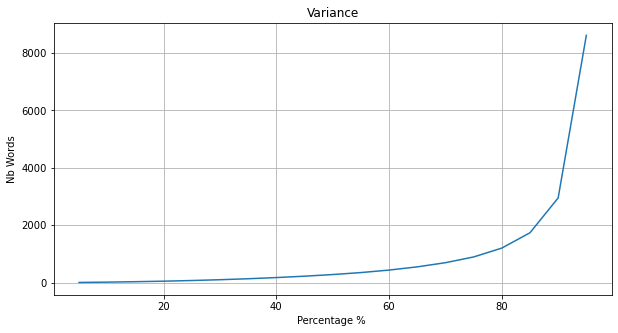

time: 3.33 s (started: 2022-01-02 17:58:00 +01:00)


In [29]:
df1 = pd.DataFrame(new_df.Txt_Clean)
df1["Txt_Count"] = df1["Txt_Clean"].apply(lambda x : len(x.split()))

txt_val = df1['Txt_Clean']
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_bow = vectorizer.fit_transform(txt_val)
tags = vectorizer.get_feature_names()
freq = tag_bow.sum(axis=0).A1
tag_to_count_map = dict(zip(tags, freq))

list = []
for key, value in tag_to_count_map.items():
    list.append([key, value]) 
    
tag_df = pd.DataFrame(list, columns=['Tags', 'Counts'])
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_df_sorted

tag_df_sorted_1 = tag_df_sorted.copy()
_sum_ = tag_df_sorted_1['Counts'].sum()
tag_df_sorted_1['_sum_'] = _sum_
tag_df_sorted_1['Perc'] = tag_df_sorted_1['Counts'] / tag_df_sorted_1['_sum_']*100
tag_df_sorted_1['Perc_cumsum'] = tag_df_sorted_1['Perc'].cumsum()
tag_df_sorted_1 = tag_df_sorted_1.reset_index()
tag_df_sorted_1.pop('index')

tag_df_sorted_05 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 5]
tag_df_sorted_10 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 10]
tag_df_sorted_15 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 15]
tag_df_sorted_20 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 20]
tag_df_sorted_25 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 25]
tag_df_sorted_30 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 30]
tag_df_sorted_35 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 35]
tag_df_sorted_40 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 40]
tag_df_sorted_45 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 45]
tag_df_sorted_50 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 50]
tag_df_sorted_55 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 55]
tag_df_sorted_60 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 60]
tag_df_sorted_65 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 65]
tag_df_sorted_70 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 70]
tag_df_sorted_75 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 75]
tag_df_sorted_80 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 80]
tag_df_sorted_85 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 85]
tag_df_sorted_90 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 90]
tag_df_sorted_95 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 95]

lst = [[5,  tag_df_sorted_05.shape[0]],
[10, tag_df_sorted_10.shape[0]],
[15, tag_df_sorted_15.shape[0]],
[20, tag_df_sorted_20.shape[0]],
[25, tag_df_sorted_25.shape[0]],
[30, tag_df_sorted_30.shape[0]],
[35, tag_df_sorted_35.shape[0]],
[40, tag_df_sorted_40.shape[0]],
[45, tag_df_sorted_45.shape[0]],
[50, tag_df_sorted_50.shape[0]],
[55, tag_df_sorted_55.shape[0]],
[60, tag_df_sorted_60.shape[0]],
[65, tag_df_sorted_65.shape[0]],
[70, tag_df_sorted_70.shape[0]],
[75, tag_df_sorted_75.shape[0]],
[80, tag_df_sorted_80.shape[0]],
[85, tag_df_sorted_85.shape[0]],
[90, tag_df_sorted_90.shape[0]],
[95, tag_df_sorted_95.shape[0]]]
       
lst_df_ = pd.DataFrame(lst)
lst_df_ = lst_df_.rename(columns={0: "perc", 1: "nb_tags"})
lst_df_ = lst_df_.set_index('perc')

plt.figure(figsize=(10, 5))
plt.plot(lst_df_)
plt.grid()
plt.title("Variance")
plt.xlabel("Percentage % ")
plt.ylabel("Nb Words")

_50_most_important = tag_df_sorted_50.shape[0]
_75_most_important = tag_df_sorted_75.shape[0]
_80_most_important = tag_df_sorted_80.shape[0]
_85_most_important = tag_df_sorted_85.shape[0]
_90_most_important = tag_df_sorted_90.shape[0]

print(_50_most_important, "tags couvrent 50% des questions")
print(_75_most_important, "tags couvrent 75% des questions")
print(_80_most_important, "tags couvrent 80% des questions")
print(_85_most_important, "tags couvrent 85% des questions")
print(_90_most_important, "tags couvrent 90% des questions")

# y

85 tags couvrent 50% des questions
398 tags couvrent 75% des questions
554 tags couvrent 80% des questions
801 tags couvrent 85% des questions
1240 tags couvrent 90% des questions


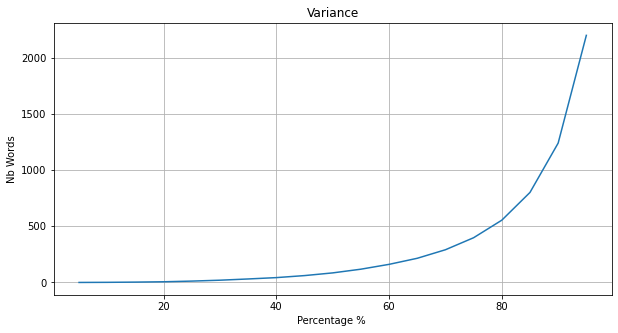

time: 612 ms (started: 2022-01-02 17:58:03 +01:00)


In [30]:
df1 = pd.DataFrame(new_df.Tags_Clean)
df1["Tags_Count"] = df1["Tags_Clean"].apply(lambda x : len(x.split()))

txt_val = df1['Tags_Clean']
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_bow = vectorizer.fit_transform(txt_val)
tags = vectorizer.get_feature_names()
freq = tag_bow.sum(axis=0).A1
tag_to_count_map = dict(zip(tags, freq))

list = []
for key, value in tag_to_count_map.items():
    list.append([key, value]) 
    
tag_df = pd.DataFrame(list, columns=['Tags', 'Counts'])
tag_df_sorted = tag_df.sort_values(['Counts'], ascending=False)
tag_df_sorted

tag_df_sorted_1 = tag_df_sorted.copy()
_sum_ = tag_df_sorted_1['Counts'].sum()
tag_df_sorted_1['_sum_'] = _sum_
tag_df_sorted_1['Perc'] = tag_df_sorted_1['Counts'] / tag_df_sorted_1['_sum_']*100
tag_df_sorted_1['Perc_cumsum'] = tag_df_sorted_1['Perc'].cumsum()
tag_df_sorted_1 = tag_df_sorted_1.reset_index()
tag_df_sorted_1.pop('index')

tag_df_sorted_05 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 5]
tag_df_sorted_10 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 10]
tag_df_sorted_15 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 15]
tag_df_sorted_20 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 20]
tag_df_sorted_25 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 25]
tag_df_sorted_30 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 30]
tag_df_sorted_35 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 35]
tag_df_sorted_40 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 40]
tag_df_sorted_45 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 45]
tag_df_sorted_50 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 50]
tag_df_sorted_55 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 55]
tag_df_sorted_60 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 60]
tag_df_sorted_65 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 65]
tag_df_sorted_70 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 70]
tag_df_sorted_75 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 75]
tag_df_sorted_80 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 80]
tag_df_sorted_85 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 85]
tag_df_sorted_90 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 90]
tag_df_sorted_95 = tag_df_sorted_1[tag_df_sorted_1.Perc_cumsum < 95]

lst = [[5,  tag_df_sorted_05.shape[0]],
[10, tag_df_sorted_10.shape[0]],
[15, tag_df_sorted_15.shape[0]],
[20, tag_df_sorted_20.shape[0]],
[25, tag_df_sorted_25.shape[0]],
[30, tag_df_sorted_30.shape[0]],
[35, tag_df_sorted_35.shape[0]],
[40, tag_df_sorted_40.shape[0]],
[45, tag_df_sorted_45.shape[0]],
[50, tag_df_sorted_50.shape[0]],
[55, tag_df_sorted_55.shape[0]],
[60, tag_df_sorted_60.shape[0]],
[65, tag_df_sorted_65.shape[0]],
[70, tag_df_sorted_70.shape[0]],
[75, tag_df_sorted_75.shape[0]],
[80, tag_df_sorted_80.shape[0]],
[85, tag_df_sorted_85.shape[0]],
[90, tag_df_sorted_90.shape[0]],
[95, tag_df_sorted_95.shape[0]]]
       
lst_df_ = pd.DataFrame(lst)
lst_df_ = lst_df_.rename(columns={0: "perc", 1: "nb_tags"})
lst_df_ = lst_df_.set_index('perc')

plt.figure(figsize=(10, 5))
plt.plot(lst_df_)
plt.grid()
plt.title("Variance")
plt.xlabel("Percentage % ")
plt.ylabel("Nb Words")

_50_most_important = tag_df_sorted_50.shape[0]
_75_most_important = tag_df_sorted_75.shape[0]
_80_most_important = tag_df_sorted_80.shape[0]
_85_most_important = tag_df_sorted_85.shape[0]
_90_most_important = tag_df_sorted_90.shape[0]

print(_50_most_important, "tags couvrent 50% des questions")
print(_75_most_important, "tags couvrent 75% des questions")
print(_80_most_important, "tags couvrent 80% des questions")
print(_85_most_important, "tags couvrent 85% des questions")
print(_90_most_important, "tags couvrent 90% des questions")

# ----

In [31]:
new_df

,Txt_Clean,Tags_Clean
0,python metaclass use,python oop metaclass class datamodel
1,good regular express valid text string make su...,c regex
2,two unsort list need produc anoth sort element...,algorithm sorting lisp list
3,tool like selenium good test user interact web...,testing browser user interface
4,like know easier way insert record alreadi exi...,c linq sql
...,...,...
38897,compani perl applic server ip new rule impleme...,mysql perl mariadb dbi
38898,typescript compil option chain null coalesc op...,typescript language design
38899,use mockk spi kotlin java class field anonym l...,kotlin mockk
38900,hope tri cro librari raku https servic doc how...,raku cro


time: 20.2 ms (started: 2022-01-02 17:58:04 +01:00)


# Vetoriz

# Vect - y

In [34]:
y_feat = 100
vectorizer = CountVectorizer(max_features=y_feat)
y = pd.DataFrame(vectorizer.fit_transform(new_df.Tags_Clean).toarray(), columns=vectorizer.get_feature_names())
print(y.shape)

y["sum"] = y.sum(axis=1)
mask = y[y["sum"] < 1]
y = y[y["sum"] >= 1]
y.pop('sum')


mask = mask.reset_index()
mask = mask['index']
mask = mask.tolist()
y

(38902, 100)


,agnostic,ajax,algorithm,apache,arrays,asp,bash,binding,browser,build,...,version,vim,visual,wcf,web,winapi,windows,winforms,wpf,xml
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 516 ms (started: 2022-01-02 18:01:16 +01:00)


# X

In [35]:
x_feat = 3439
vetorizar = TfidfVectorizer(max_features=x_feat) 
X = pd.DataFrame(vetorizar.fit_transform(new_df.Txt_Clean).toarray())
print(X.shape)
X = X.drop(mask)
X

(38902, 3439)


,0,1,2,3,4,5,6,7,8,9,...,3429,3430,3431,3432,3433,3434,3435,3436,3437,3438
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38895,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38896,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38897,0.0,0.178806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38898,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


time: 6.67 s (started: 2022-01-02 18:01:20 +01:00)


# Reduc Dim

In [36]:
i = 1000
print('X before TruncatedSVD', X.shape)
svd = TruncatedSVD(n_components=i, random_state=42)
X_svd = svd.fit_transform(X)
print('X after TruncatedSVD', X_svd.shape)

X before TruncatedSVD (32455, 3439)
X after TruncatedSVD (32455, 1000)
time: 1min 21s (started: 2022-01-02 18:01:31 +01:00)


In [38]:
X_svd_df = pd.DataFrame(X_svd)

X_svd_df.to_csv('X_svd_df_.csv', index=False) 
y.to_csv('y_.csv', index=False) 

time: 1min 13s (started: 2022-01-02 18:04:43 +01:00)


# Metrics

In [39]:
def avg_jacard(y_true,y_pred):
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)    
    return jacard.mean()*100

    
def print_score(y_pred, y_test):
    print("Accuracy :",metrics.accuracy_score(y_test,y_pred))
    print("Macro f1 score :",metrics.f1_score(y_test, y_pred, average = 'macro'))
    print("Micro f1 score :",metrics.f1_score(y_test, y_pred, average = 'micro'))
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")

time: 5.69 ms (started: 2022-01-02 18:17:14 +01:00)


In [40]:
X_svd_df = pd.DataFrame(X_svd)

print('X_svd_df : ', X_svd_df.shape)
print('y :', y.shape)

X_svd_df :  (32455, 1000)
y : (32455, 100)
time: 5.74 ms (started: 2022-01-02 18:17:15 +01:00)


In [41]:


X_train =  X_svd_df.iloc[0:10000]
X_test =  X_svd_df.iloc[10000:20000]
y_train = y.iloc[0:10000]
y_test = y.iloc[10000:20000]


print('X_train :', X_train.shape)
print('X_test :', X_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)

X_train : (10000, 1000)
X_test : (10000, 1000)
y_train : (10000, 100)
y_test : (10000, 100)
time: 3.87 ms (started: 2022-01-02 18:17:17 +01:00)


In [42]:
model_1 = SGDClassifier(alpha=1e-05, loss='log')
model_2 = LogisticRegression(max_iter=10000)
model_3 = ExtraTreesClassifier()
model_4 = RandomForestClassifier(n_estimators=50, random_state=0)
model_5 = LGBMClassifier() 
model_6 = LinearSVC(class_weight='balanced', max_iter=10000)

time: 3.85 ms (started: 2022-01-02 18:17:17 +01:00)


In [43]:
# y= 100 // jacard : 42
print(str(model_1),'  ', datetime.now().strftime("%H:%M:%S"))
clf_1 = OneVsRestClassifier(model_1)
clf_1.fit(X_train, y_train)
y_pred = clf_1.predict(X_test)
print_score(y_pred,y_test)

SGDClassifier(alpha=1e-05, loss='log')    18:17:18
Accuracy : 0.2705
Macro f1 score : 0.41190256608262893
Micro f1 score : 0.5751148470335256
Jacard score: 44.348369047619194
Hamming loss: 1.3041
---
time: 37.2 s (started: 2022-01-02 18:17:18 +01:00)


In [44]:
print(str(model_2),'  ', datetime.now().strftime("%H:%M:%S"))
clf_2 = OneVsRestClassifier(model_2)
clf_2.fit(X_train, y_train)
y_pred = clf_2.predict(X_test)
print_score(y_pred,y_test)

LogisticRegression(max_iter=10000)    18:18:18
Accuracy : 0.1545
Macro f1 score : 0.1580993795945937
Micro f1 score : 0.37683785676042997
Jacard score: 24.761630952380955
Hamming loss: 1.5131000000000001
---
time: 37 s (started: 2022-01-02 18:18:18 +01:00)


In [ ]:
print(str(model_3),'  ', datetime.now().strftime("%H:%M:%S"))
clf_3 = OneVsRestClassifier(model_3)
clf_3.fit(X_train, y_train)
y_pred = clf_3.predict(X_test)
print_score(y_pred,y_test)


In [ ]:
print(str(model_4),'  ', datetime.now().strftime("%H:%M:%S"))
clf_4 = OneVsRestClassifier(model_4)
clf_4.fit(X_train, y_train)
y_pred = clf_4.predict(X_test)
print_score(y_pred,y_test)


In [ ]:
print(str(model_5),'  ', datetime.now().strftime("%H:%M:%S"))
clf_5 = OneVsRestClassifier(model_5)
clf_5.fit(X_train, y_train)
y_pred = clf_5.predict(X_test)
print_score(y_pred,y_test)


In [ ]:
print(str(model_6),'  ', datetime.now().strftime("%H:%M:%S"))
clf_6 = OneVsRestClassifier(model_6)
clf_6.fit(X_train, y_train)
y_pred = clf_6.predict(X_test)
print_score(y_pred,y_test)


In [45]:
data = [["SGDClassifier",0.35,0.10,0.30,18.85,1.3, 5],
["LogisticRegression",0.25,0.10,0.310,19,1.34, 5],
["ExtraTreesClassifier",0.16,0.00,0.01,0.04,1.60, 10],
["RandomForestClassifier",0.17,0.01,0.05,2.55,1.55, 60],
["LGBMClassifier",0.27,0.17,0.37,24.31,1.29, 30],
["LinearSVC",0.17,0.47,0.52,37.98,1.88, 75]]


df = pd.DataFrame(data, columns=['model','Acc','f1_Macro','f1_Micro','Jaccard','Hamming','Timing'])
df.dtypes

model        object
Acc         float64
f1_Macro    float64
f1_Micro    float64
Jaccard     float64
Hamming     float64
Timing        int64
dtype: object

time: 11.4 ms (started: 2022-01-02 18:19:04 +01:00)


In [46]:
import seaborn as sns

def _graph_(xXx,yYy):
    sns.set_theme(style="whitegrid")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    ax = sns.barplot(x="model", y=xXx, data=df).set_title(yYy , " - Model Comparaison")

time: 889 µs (started: 2022-01-02 18:19:08 +01:00)


AttributeError: 'str' object has no attribute 'pop'

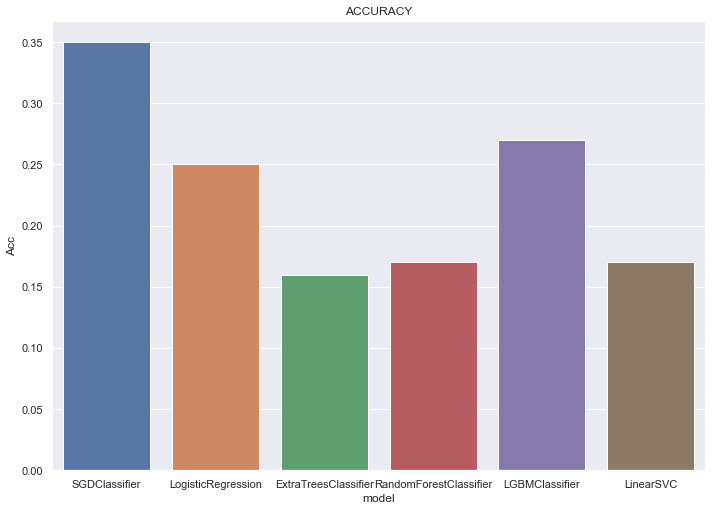

time: 413 ms (started: 2022-01-02 18:19:11 +01:00)


In [47]:
_graph_('Acc', 'ACCURACY')

AttributeError: 'str' object has no attribute 'pop'

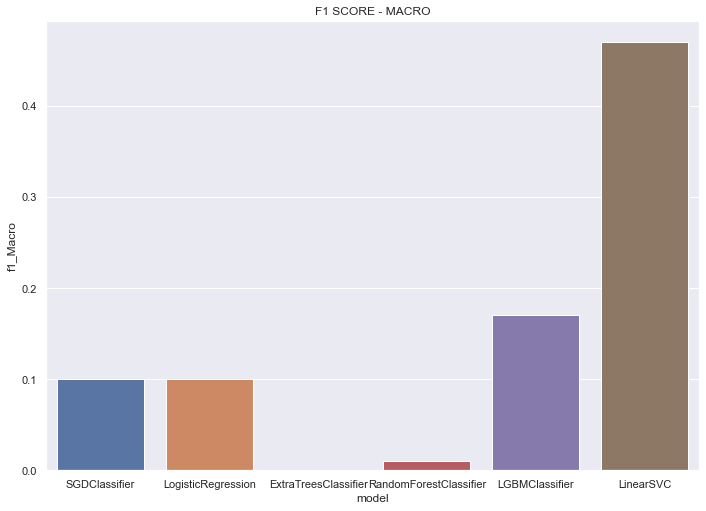

time: 273 ms (started: 2022-01-02 18:19:12 +01:00)


In [48]:
_graph_('f1_Macro', 'F1 SCORE - MACRO')

AttributeError: 'str' object has no attribute 'pop'

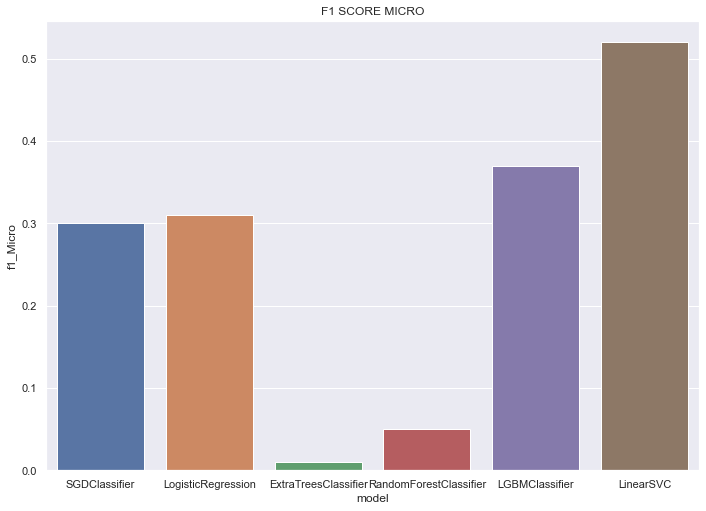

time: 266 ms (started: 2022-01-02 18:19:13 +01:00)


In [49]:
_graph_('f1_Micro', 'F1 SCORE MICRO')

AttributeError: 'str' object has no attribute 'pop'

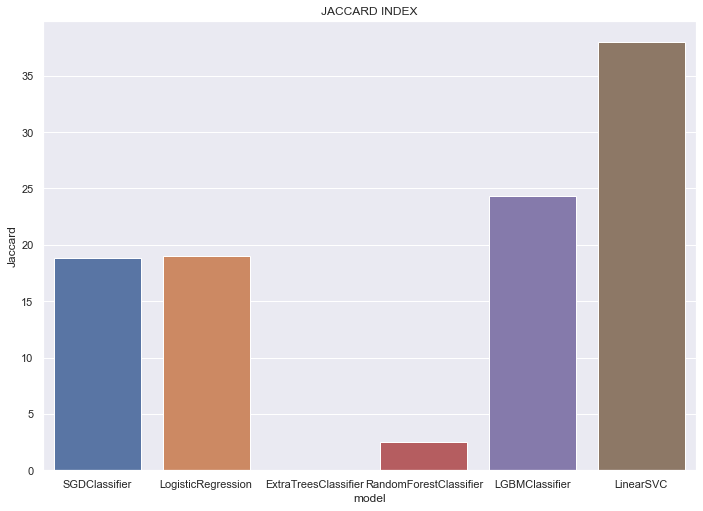

time: 266 ms (started: 2022-01-02 18:19:14 +01:00)


In [50]:
_graph_('Jaccard', 'JACCARD INDEX')

AttributeError: 'str' object has no attribute 'pop'

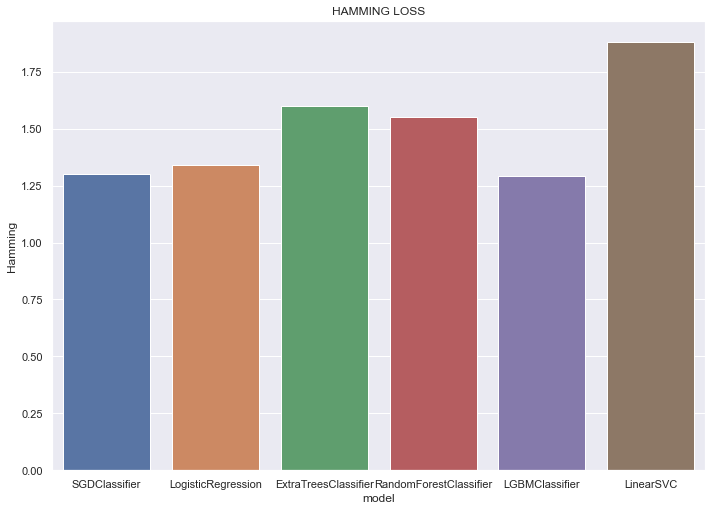

time: 270 ms (started: 2022-01-02 18:19:14 +01:00)


In [51]:
_graph_('Hamming', 'HAMMING LOSS')

AttributeError: 'str' object has no attribute 'pop'

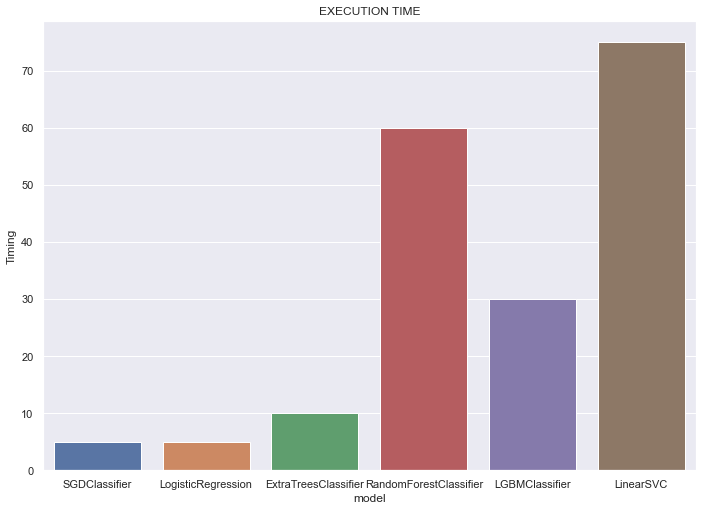

time: 268 ms (started: 2022-01-02 18:19:15 +01:00)


In [52]:
_graph_('Timing', 'EXECUTION TIME')

In [53]:
print(clf_1)

OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, loss='log'))
time: 1.72 ms (started: 2022-01-02 18:19:34 +01:00)


In [ ]:
_len_ = y_test.shape[0]


lst_mod = [clf_1, clf_2,clf_3,clf_4,clf_5]
for xXx in lst_mod:
    print(xXx)
    y_proba_df = xXx.predict_proba(X_test)
    y_pred_df = pd.DataFrame(y_proba_df, columns=[y.columns])
    row = []
    for i in tqdm(range(_len_)):
        _my_score_(i)
    eval_df = pd.DataFrame(row, columns=['Pred','Real','Match'])
    eval_df['Eval'] = eval_df['Match'] / eval_df['Real']
    _eval_val = eval_df.Eval.mean(axis = 0)

    print('My Score : ' , _eval_val)



In [54]:
data_my_score = [["SGDClassifier - Supervisé",0.73,0.25, 0.40,0.56, 42, 1.32, 1],
["LogisticRegression - Supervisé",0.70,0.14, 0.14, 0.35,23, 1.55, 1],
["ExtraTreesClassifier - Supervisé",0.42,0.01,0.01, 0.01,0.11, 1.92, 20],
["RandomForestClassifier - Supervisé",0.47,0.02, 0.021, 0.07,3.88, 1.85, 60],
["LGBMClassifier - Supervisé",0.58, 0.17, 0.20,0.42, 29,1.48, 20],
["SGDClassifier - Semi - NMF", 0.30, 0.17,0.01,0.10,4,1.54, 1],
["LogisticRegression - Semi - NMF",0.29,  0.17,0.00,0.00,0.30,1.58, 1],
["ExtraTreesClassifier - Semi - NMF", 0.29, 0.17,0.03, 0.18,8,1.56, 1],
["RandomForestClassifier - Semi - NMF", 0.31, 0.18,0.03, 0.19,9,1.52, 1],
["LGBMClassifier - Semi - NMF",0.32, 0.17,0.04,0.19,9,1.57, 1],
["SGDClassifier - Semi - LDA",0.21,0.16,0.00,0.03,1, 1.60,1],
["LogisticRegression - Semi - LDA", 0.26,0.16,0.00,0.03,1, 1.6,1],
["ExtraTreesClassifier - Semi - LDA",0.15,0.09,0.03,0.07,4,2.33,1],
["RandomForestClassifier - Semi - LDA",0.16,0.13,0.02,0.07,3,1.91,1],
["LGBMClassifier - Semi - LDA",0.20,0.14,0.01,0.05,2,1.77,1]]

time: 1.52 ms (started: 2022-01-02 18:19:48 +01:00)


In [55]:
df = pd.DataFrame(data_my_score, columns=['model',"My_score",'Acc','f1_Macro','f1_Micro','Jaccard','Hamming','Timing'])
df

,model,My_score,Acc,f1_Macro,f1_Micro,Jaccard,Hamming,Timing
0,SGDClassifier - Supervisé,0.73,0.25,0.400,0.56,42.00,1.32,1
1,LogisticRegression - Supervisé,0.70,0.14,0.140,0.35,23.00,1.55,1
2,ExtraTreesClassifier - Supervisé,0.42,0.01,0.010,0.01,0.11,1.92,20
3,RandomForestClassifier - Supervisé,0.47,0.02,0.021,0.07,3.88,1.85,60
4,LGBMClassifier - Supervisé,0.58,0.17,0.200,0.42,29.00,1.48,20
5,SGDClassifier - Semi - NMF,0.30,0.17,0.010,0.10,4.00,1.54,1
6,LogisticRegression - Semi - NMF,0.29,0.17,0.000,0.00,0.30,1.58,1
7,ExtraTreesClassifier - Semi - NMF,0.29,0.17,0.030,0.18,8.00,1.56,1
8,RandomForestClassifier - Semi - NMF,0.31,0.18,0.030,0.19,9.00,1.52,1
9,LGBMClassifier - Semi - NMF,0.32,0.17,0.040,0.19,9.00,1.57,1


time: 26 ms (started: 2022-01-02 18:19:49 +01:00)


In [56]:
import seaborn as sns

def _graph_(xXx,yYy, df):
    df = df.sort_values([xXx], ascending=False)
    sns.set_theme(style="whitegrid")
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.xticks(rotation=90)
    ax = sns.barplot(x="model", y=xXx, data=df).set_title(yYy , " - Model Comparaison")

time: 866 µs (started: 2022-01-02 18:19:52 +01:00)


AttributeError: 'str' object has no attribute 'pop'

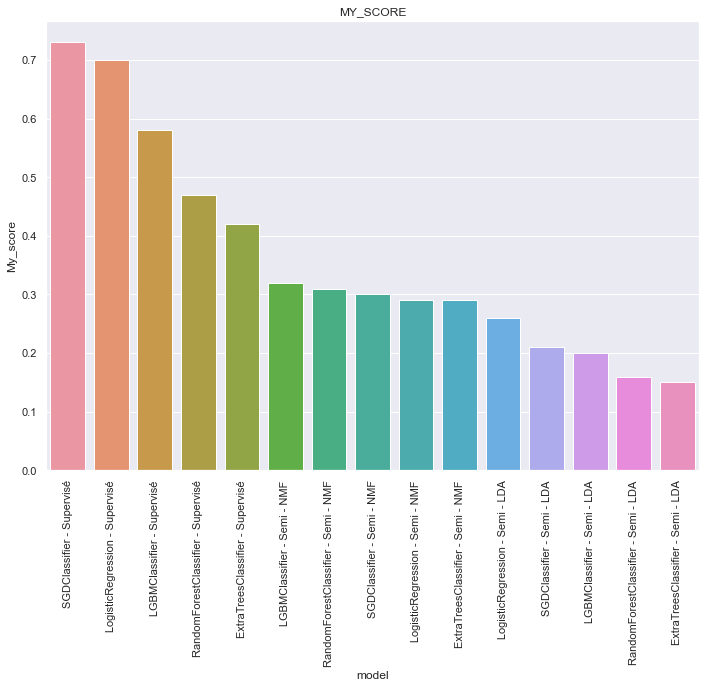

time: 435 ms (started: 2022-01-02 18:19:54 +01:00)


In [57]:
_graph_('My_score', 'MY_SCORE', df)

AttributeError: 'str' object has no attribute 'pop'

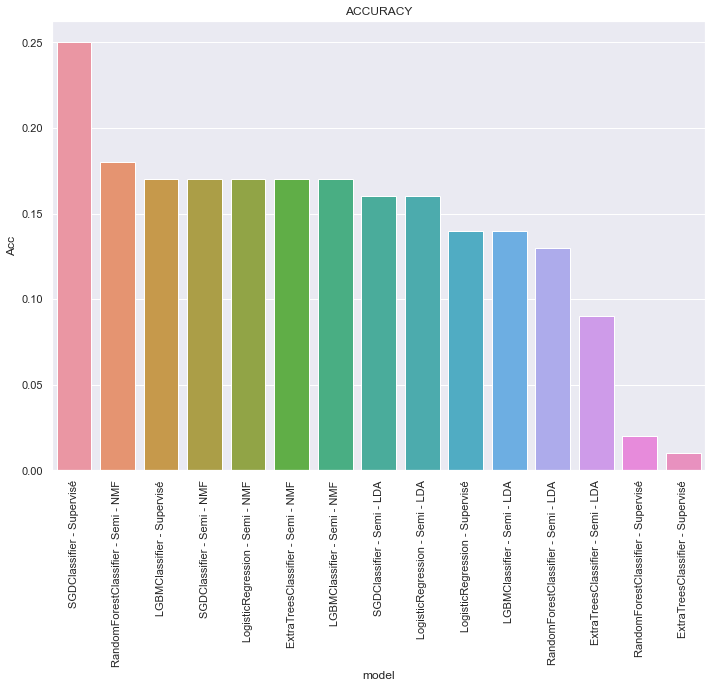

time: 480 ms (started: 2022-01-02 18:19:54 +01:00)


In [58]:
_graph_('Acc', 'ACCURACY', df)

AttributeError: 'str' object has no attribute 'pop'

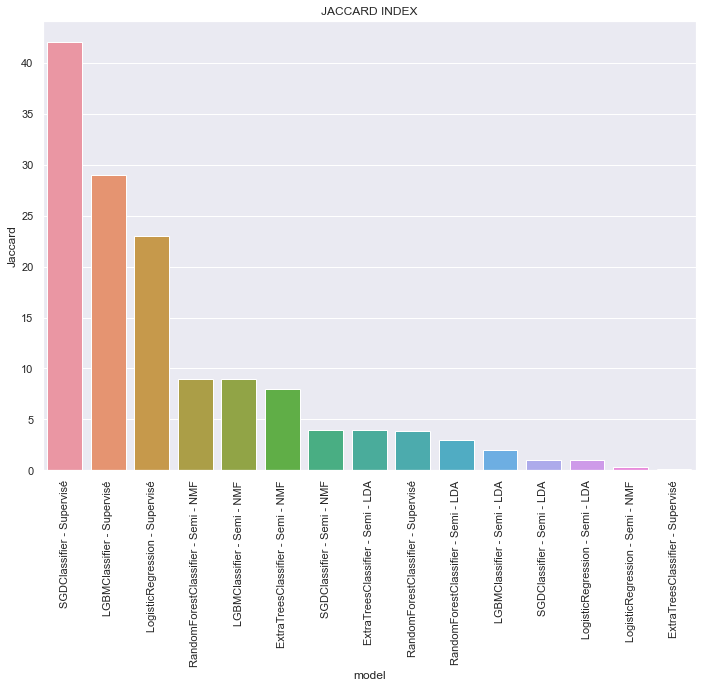

time: 429 ms (started: 2022-01-02 18:19:55 +01:00)


In [59]:
_graph_('Jaccard', 'JACCARD INDEX', df)

AttributeError: 'str' object has no attribute 'pop'

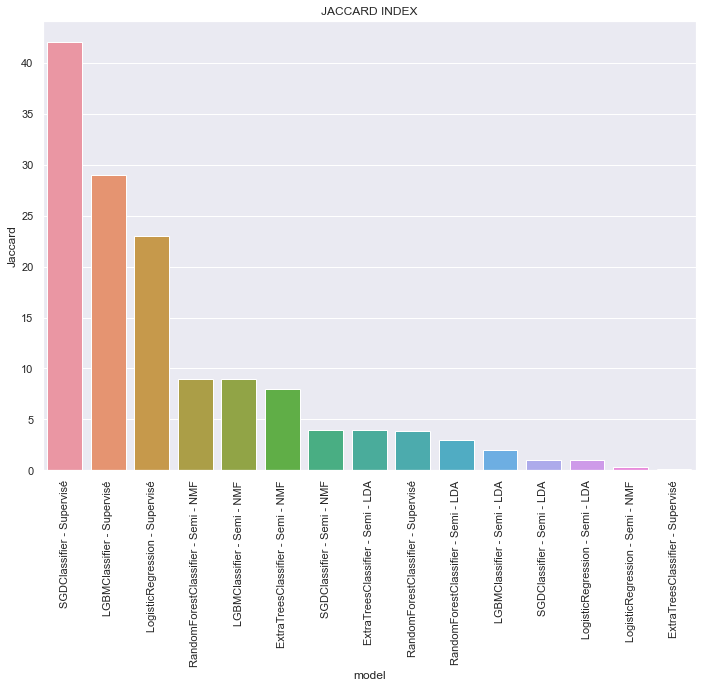

time: 412 ms (started: 2022-01-02 18:19:56 +01:00)


In [60]:
_graph_('Jaccard', 'JACCARD INDEX', df)

AttributeError: 'str' object has no attribute 'pop'

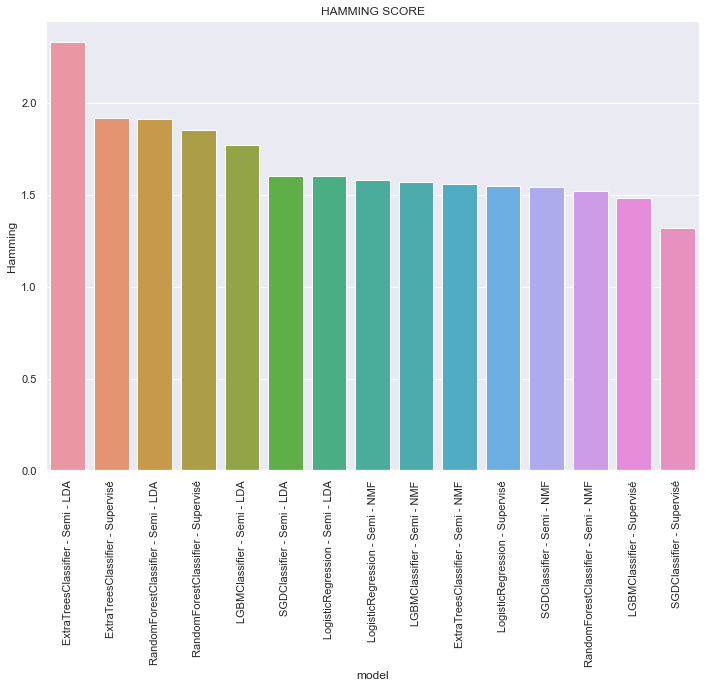

time: 912 ms (started: 2022-01-03 15:20:19 +01:00)


In [75]:
_graph_('Hamming', 'HAMMING SCORE', df)

AttributeError: 'str' object has no attribute 'pop'

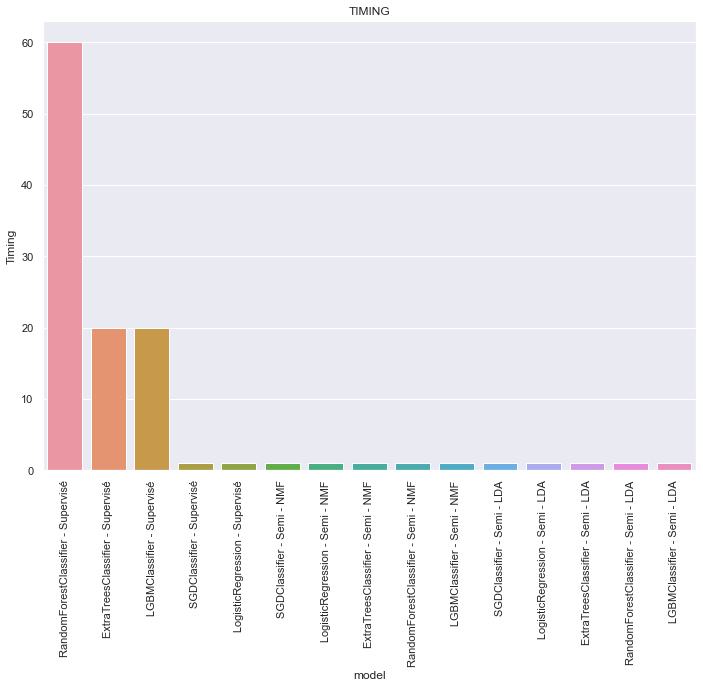

time: 546 ms (started: 2022-01-03 15:21:21 +01:00)


In [76]:
_graph_('Timing', 'TIMING', df)

In [ ]:
_graph_('f1_Micro', 'HAMMING SCORE', df)

In [62]:
# Determiner le meilleurs model
# Faire un GridSearch
# Creer un model avec un max de données
# Export


time: 345 µs (started: 2022-01-02 18:19:57 +01:00)


# My Score

In [64]:
row = []

def _eval_(index):
    # ---------------------------------------------
    y_pred_df = pd.DataFrame(y_proba_df, columns=[y.columns])
    row_pred_1 = pd.DataFrame(y_pred_df.iloc[index])
    row_pred_1 = row_pred_1.sort_values(by=[index], ascending=False)
    row_pred_2 = row_pred_1.head(3)
    row_pred_2 = row_pred_2.reset_index()
    row_pred_2.pop(index)
    row_pred_2 = row_pred_2.rename(columns={'level_0': "Find_tag"})
    row_pred_val = row_pred_2.Find_tag.values
    row_pred_val = row_pred_val.tolist()
    len_pred_val = len(row_pred_val)
    # ---------------------------------------------
    y_test_1 = pd.DataFrame(y_test).reset_index()
    y_test_1.pop('index')
    row_test_1 = pd.DataFrame(y_test_1.iloc[index])
    row_test_1 = row_test_1[row_test_1[index] > 0]
    row_test_1 = row_test_1.reset_index()
    row_test_1.pop(index)
    row_test_1 = row_test_1.rename(columns={'index': "Real_tag"})
    row_real_val = row_test_1.Real_tag.values
    row_real_val = row_real_val.tolist()
    len_real_val = len(row_real_val)
    # -------------------------------------------
    compare = set(row_pred_val) & set(row_real_val)
    len_compare_ok  = len(compare)
    # -------------------------------------------
    row.append([len_pred_val,len_real_val,len_compare_ok])


time: 2.26 ms (started: 2022-01-02 18:25:31 +01:00)


In [65]:
_len_ = y_test.shape[0]

xXx = clf_1
print(xXx)
y_proba_df = xXx.predict_proba(X_test)
y_pred_df = pd.DataFrame(y_proba_df, columns=[y.columns])
row = []
for i in tqdm(range(_len_)):
    _eval_(i)
eval_df = pd.DataFrame(row, columns=['Pred','Real','Match'])
eval_df['Eval'] = eval_df['Match'] / eval_df['Real']
_eval_val = eval_df.Eval.mean(axis = 0)

print('My Score : ' , _eval_val)



OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, loss='log'))


100%|████████████████████████████████████| 10000/10000 [01:38<00:00, 101.15it/s]

My Score :  0.738725952380955
time: 1min 41s (started: 2022-01-02 18:25:37 +01:00)


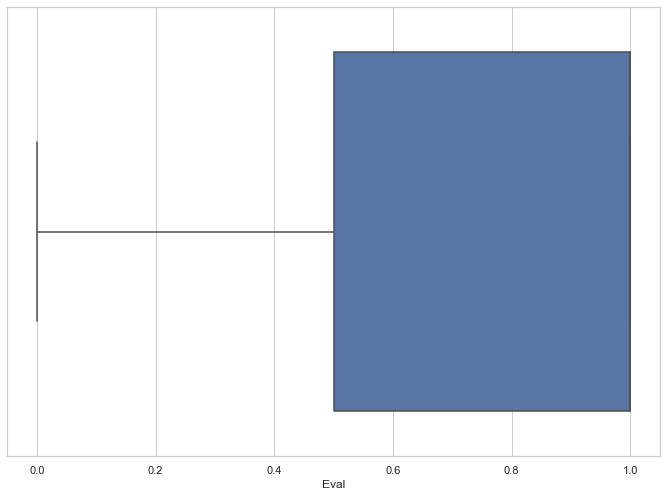

time: 200 ms (started: 2022-01-02 18:27:25 +01:00)


In [66]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=eval_df["Eval"])

In [67]:
eval_df["Eval"].describe()

count    10000.000000
mean         0.738726
std          0.354591
min          0.000000
25%          0.500000
50%          1.000000
75%          1.000000
max          1.000000
Name: Eval, dtype: float64

time: 13.7 ms (started: 2022-01-02 18:27:25 +01:00)


# GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

params = {"estimator__alpha":[1e-06, 1e-05,1e-04,1e-03,1e-02,1e-01]}

log_reg_clf = OneVsRestClassifier(SGDClassifier(loss='log'))

logistic_gs = GridSearchCV(log_reg_clf, params ,scoring = 'accuracy', cv=2, verbose = 8, n_jobs=1)

logistic_gs.fit(X_train, y_train)

print(logistic_gs.best_estimator_)
print(logistic_gs.best_score_)

(10000, 1000)
(10000, 1000)
(10000, 100)
(10000, 100)
Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] estimator__alpha=1e-06 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. estimator__alpha=1e-06, score=0.224, total=  42.3s
[CV] estimator__alpha=1e-06 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.4s remaining:    0.0s


[CV] .............. estimator__alpha=1e-06, score=0.229, total=  50.5s
[CV] estimator__alpha=1e-05 ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.5min remaining:    0.0s


[CV] .............. estimator__alpha=1e-05, score=0.229, total=  35.8s
[CV] estimator__alpha=1e-05 ..........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.1min remaining:    0.0s


[CV] .............. estimator__alpha=1e-05, score=0.241, total=  37.4s
[CV] estimator__alpha=0.0001 .........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.8min remaining:    0.0s


[CV] ............. estimator__alpha=0.0001, score=0.152, total=  30.2s
[CV] estimator__alpha=0.0001 .........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.3min remaining:    0.0s


[CV] ............. estimator__alpha=0.0001, score=0.153, total=  31.2s
[CV] estimator__alpha=0.001 ..........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.8min remaining:    0.0s


[CV] .............. estimator__alpha=0.001, score=0.003, total=  25.7s
[CV] estimator__alpha=0.001 ..........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.2min remaining:    0.0s


[CV] .............. estimator__alpha=0.001, score=0.004, total=  27.4s
[CV] estimator__alpha=0.01 ...........................................
[CV] ............... estimator__alpha=0.01, score=0.000, total=  23.2s
[CV] estimator__alpha=0.01 ...........................................
[CV] ............... estimator__alpha=0.01, score=0.000, total=  23.5s
[CV] estimator__alpha=0.1 ............................................
[CV] ................ estimator__alpha=0.1, score=0.000, total=  24.7s
[CV] estimator__alpha=0.1 ............................................
[CV] ................ estimator__alpha=0.1, score=0.000, total=  24.6s


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  6.3min finished


OneVsRestClassifier(estimator=SGDClassifier(alpha=1e-05, loss='log'))
0.23509999999999998
time: 7min 26s (started: 2022-01-02 18:31:34 +01:00)


In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

params = {"estimator__alpha":[6e-06,7e-06,8e-06, 9e-06, 1e-05,2e-05, 3e-05]}

log_reg_clf = OneVsRestClassifier(SGDClassifier(loss='log'))

logistic_gs = GridSearchCV(log_reg_clf, params ,scoring = 'accuracy', cv=2, verbose = 8, n_jobs=1)

logistic_gs.fit(X_train, y_train)

print(logistic_gs.best_estimator_)
print(logistic_gs.best_score_)

(10000, 1000)
(10000, 1000)
(10000, 100)
(10000, 100)
Fitting 2 folds for each of 7 candidates, totalling 14 fits
[CV] estimator__alpha=6e-06 ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. estimator__alpha=6e-06, score=0.232, total=  18.9s
[CV] estimator__alpha=6e-06 ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.9s remaining:    0.0s


[CV] .............. estimator__alpha=6e-06, score=0.238, total=  18.1s
[CV] estimator__alpha=7e-06 ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   37.0s remaining:    0.0s


[CV] .............. estimator__alpha=7e-06, score=0.235, total=  17.3s
[CV] estimator__alpha=7e-06 ..........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   54.3s remaining:    0.0s


[CV] .............. estimator__alpha=7e-06, score=0.236, total=  17.9s
[CV] estimator__alpha=8e-06 ..........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.2min remaining:    0.0s


[CV] .............. estimator__alpha=8e-06, score=0.233, total=  18.1s
[CV] estimator__alpha=8e-06 ..........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s


[CV] .............. estimator__alpha=8e-06, score=0.246, total=  17.8s
[CV] estimator__alpha=9e-06 ..........................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.8min remaining:    0.0s


[CV] .............. estimator__alpha=9e-06, score=0.227, total=  17.5s
[CV] estimator__alpha=9e-06 ..........................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.1min remaining:    0.0s


[CV] .............. estimator__alpha=9e-06, score=0.240, total=  17.4s
[CV] estimator__alpha=1e-05 ..........................................
[CV] .............. estimator__alpha=1e-05, score=0.236, total=  17.3s
[CV] estimator__alpha=1e-05 ..........................................
[CV] .............. estimator__alpha=1e-05, score=0.236, total=  17.9s
[CV] estimator__alpha=2e-05 ..........................................
[CV] .............. estimator__alpha=2e-05, score=0.223, total=  17.3s
[CV] estimator__alpha=2e-05 ..........................................
[CV] .............. estimator__alpha=2e-05, score=0.227, total=  17.3s
[CV] estimator__alpha=3e-05 ..........................................
[CV] .............. estimator__alpha=3e-05, score=0.219, total=  16.8s
[CV] estimator__alpha=3e-05 ..........................................
[CV] .............. estimator__alpha=3e-05, score=0.225, total=  16.8s


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:  4.1min finished


OneVsRestClassifier(estimator=SGDClassifier(alpha=8e-06, loss='log'))
0.2395
time: 4min 40s (started: 2022-01-02 18:50:38 +01:00)


# Export

In [ ]:
with open('model.pk', 'wb') as f:
    pickle.dump(clf_1, f)

In [ ]:
with open('vect.pk', 'wb') as f:
    pickle.dump(clf_1, f)

In [ ]:
with open('svd.pk', 'wb') as f:
    pickle.dump(svd, f)